# Import the required libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os.path

import warnings
# visuallization
import matplotlib.pyplot as plt
# import missingno as msno
import seaborn as sns

#Machine Learning
## model
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
## tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# import Scaling Model
from sklearn.preprocessing import StandardScaler ## All features have a normal distribution of 0 mean and 1 variance.
from sklearn.preprocessing import MinMaxScaler ## Makes all features have data values between 0 and 1.
from sklearn.preprocessing import MaxAbsScaler ## Makes the absolute value of all features lie between 0 and 1.
from sklearn.preprocessing import RobustScaler
## RobustScaler is similar to StandardScaler.
## However, StandardScaler uses mean and variance, while RobustScaler uses median and quartile.
from sklearn.preprocessing import Normalizer
## The previous four methods use statistics for each feature.

from catboost import CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV

# read the data

In [2]:
df = pd.read_csv("exams.csv")

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some high school,free/reduced,none,57,76,69
1,male,group D,high school,free/reduced,none,39,40,40
2,female,group C,some college,standard,none,66,67,66
3,female,group E,high school,standard,none,61,73,74
4,male,group A,some high school,standard,none,48,44,45


# check for null values

In [4]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### DataFrame haven't any missing(null) values

# minimum, maximum, mean, median, mode, standard deviation etc

In [5]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.476000,69.584000,68.480000
std,15.249064,14.447688,15.228575
min,12.000000,15.000000,20.000000
25%,56.000000,60.000000,58.000000
50%,67.000000,70.000000,68.500000
75%,78.000000,80.000000,79.000000
max,100.000000,100.000000,100.000000


# total marks
-Total marks (for a student) = sum of the marks/scores in the 3 examinaion for a particular student.

-Percentage marks (for a student) = Total obtained marks divided by total marks, multiplied by 100.

In [6]:
df["Total marks"] = df["math score"] + df["reading score"] + df["writing score"]
df["Percentage"] = df["Total marks"] / 3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total marks,Percentage
0,female,group D,some high school,free/reduced,none,57,76,69,202,67.333333
1,male,group D,high school,free/reduced,none,39,40,40,119,39.666667
2,female,group C,some college,standard,none,66,67,66,199,66.333333
3,female,group E,high school,standard,none,61,73,74,208,69.333333
4,male,group A,some high school,standard,none,48,44,45,137,45.666667


# detect noisy data

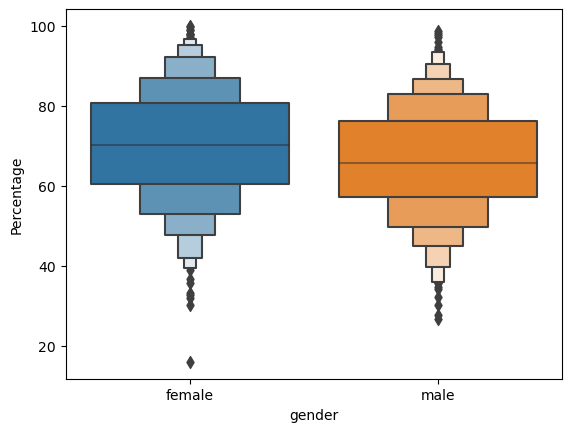

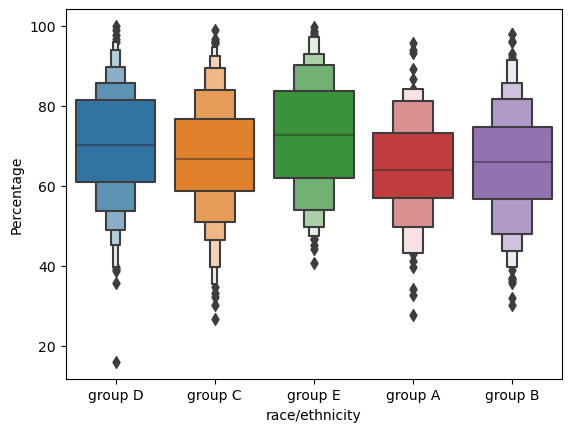

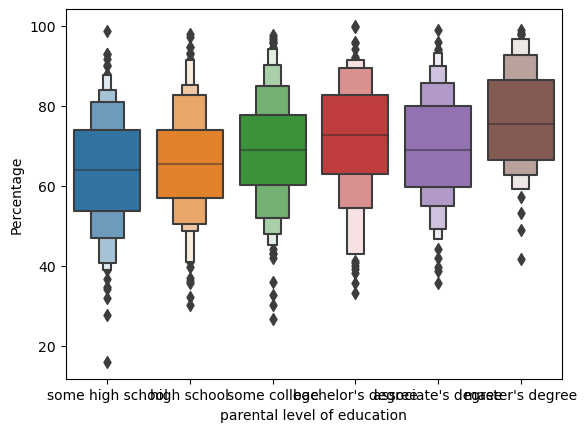

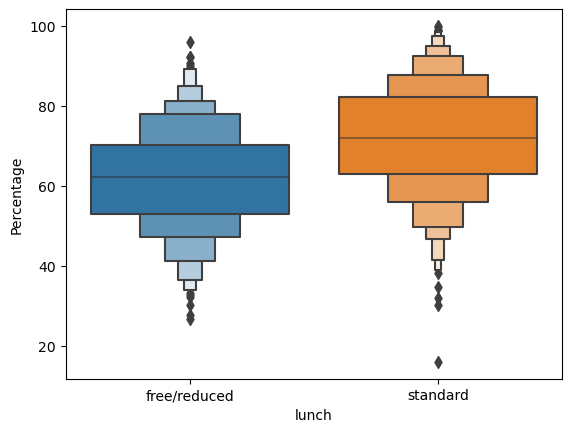

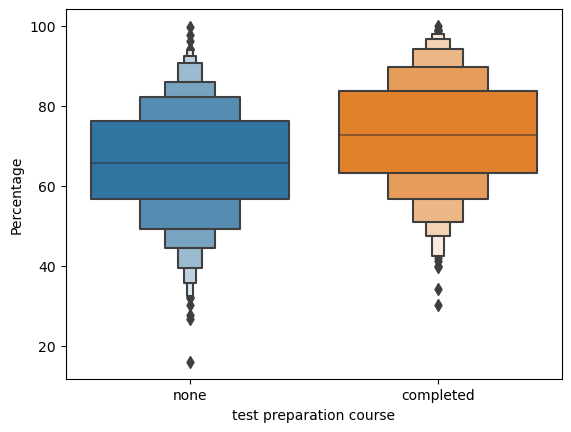

In [7]:
# Box plot
sns.boxenplot(x="gender", y="Percentage", data=df)
plt.show()
sns.boxenplot(x="race/ethnicity", y="Percentage", data=df)
plt.show()
sns.boxenplot(x="parental level of education", y="Percentage", data=df)
plt.show()
sns.boxenplot(x="lunch", y="Percentage", data=df)
plt.show()
sns.boxenplot(x="test preparation course", y="Percentage", data=df)
plt.show()

In [8]:
# # حذف داده‌های پرت
df = df[df["Percentage"] < df["Percentage"].quantile(0.95)]
df = df[df["Percentage"] > df["Percentage"].quantile(0.05)]

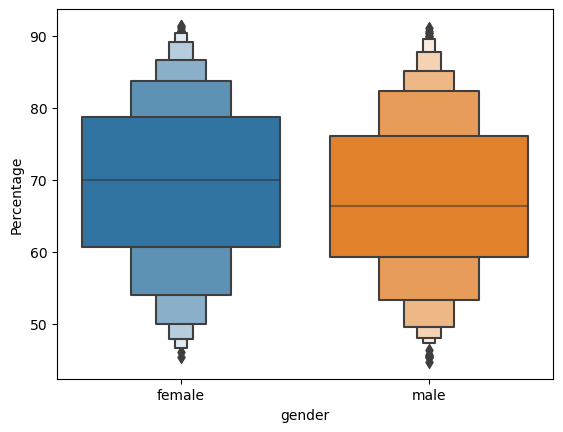

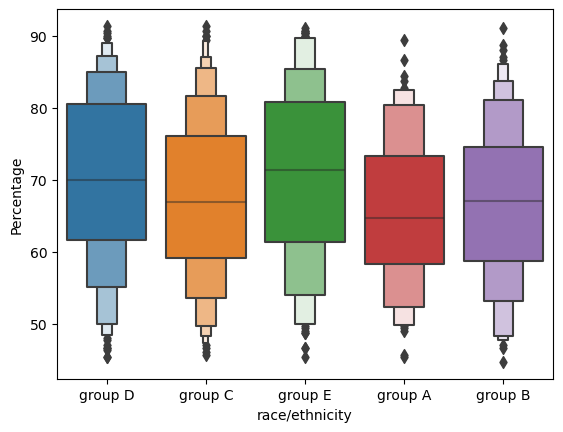

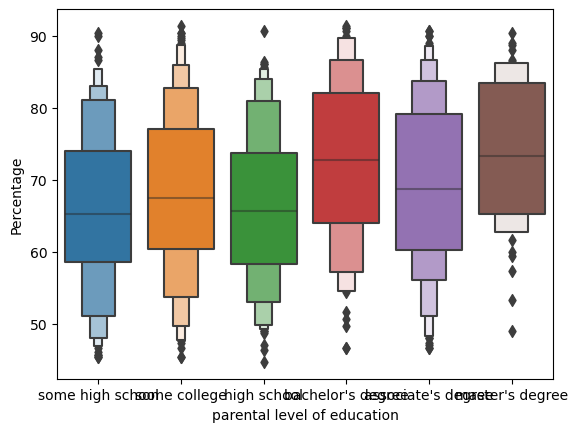

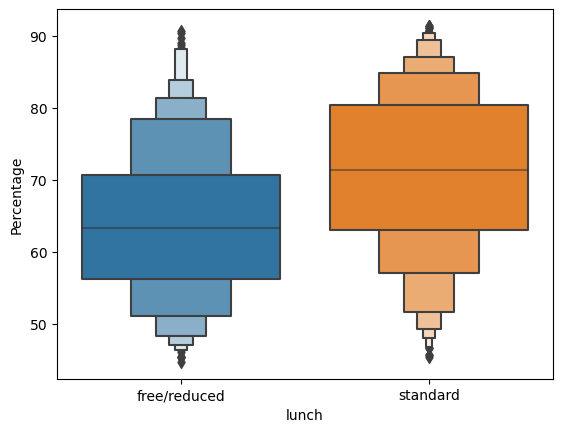

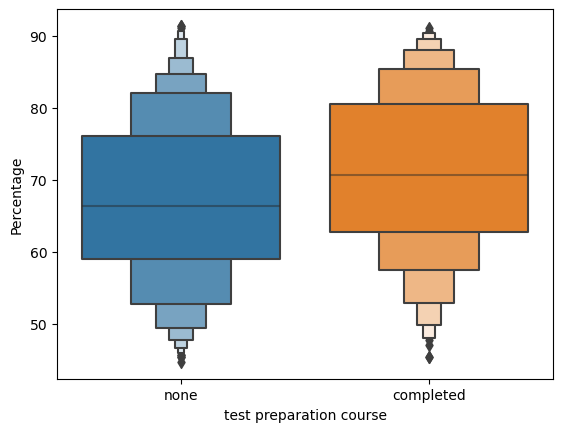

In [9]:
# Box plot
sns.boxenplot(x="gender", y="Percentage", data=df)
plt.show()
sns.boxenplot(x="race/ethnicity", y="Percentage", data=df)
plt.show()
sns.boxenplot(x="parental level of education", y="Percentage", data=df)
plt.show()
sns.boxenplot(x="lunch", y="Percentage", data=df)
plt.show()
sns.boxenplot(x="test preparation course", y="Percentage", data=df)
plt.show()

# BINING

# assign grades to the marks

In [10]:
# Quantile Binning
df['Grade_math 1 bin'] = pd.qcut(df['math score'], 2, labels=['low', 'high'])

df['Grade_math bin 4'] = pd.qcut(df['math score'], 4, labels=['very low', 'low', 'high', 'very high'])

df['Grade_math bin 8'] = pd.qcut(df['math score'], 8, labels=['very low', 'low', 'medium low', 'medium high', 'high', 'very high', 'extremely high', 'exceptionally high'])



# Quantile Binning
df['Grade_reading 1 bin'] = pd.qcut(df['reading score'], 2, labels=['low', 'high'])

df['Grade_reading 4 bin'] = pd.qcut(df['reading score'], 4, labels=['very low', 'low', 'high', 'very high'])

df['Grade_reading 8 bin'] = pd.qcut(df['reading score'], 8, labels=['very low', 'low', 'medium low', 'medium high', 'high', 'very high', 'extremely high', 'exceptionally high'])


# Quantile Binning
df['Grade_writing 1 bin'] = pd.qcut(df['writing score'], 2, labels=['low', 'high'])

df['Grade_writing 4 bin'] = pd.qcut(df['writing score'], 4, labels=['very low', 'low', 'high', 'very high'])

df['Grade_writing 8 bin'] = pd.qcut(df['writing score'], 8, labels=['very low', 'low', 'medium low', 'medium high', 'high', 'very high', 'extremely high', 'exceptionally high'])


<AxesSubplot:xlabel='Grade_math 1 bin', ylabel='count'>

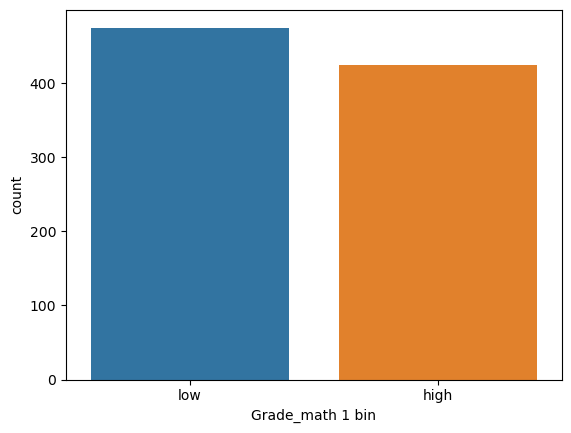

In [11]:
sns.countplot(x='Grade_math 1 bin', data=df)

<AxesSubplot:xlabel='Grade_math bin 4', ylabel='count'>

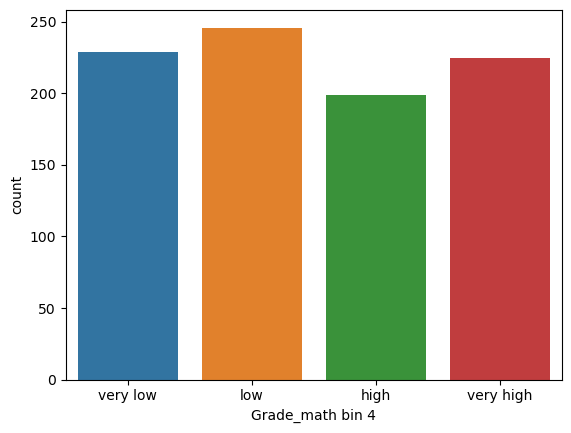

In [12]:
sns.countplot(x='Grade_math bin 4', data=df)


<AxesSubplot:xlabel='Grade_math bin 8', ylabel='count'>

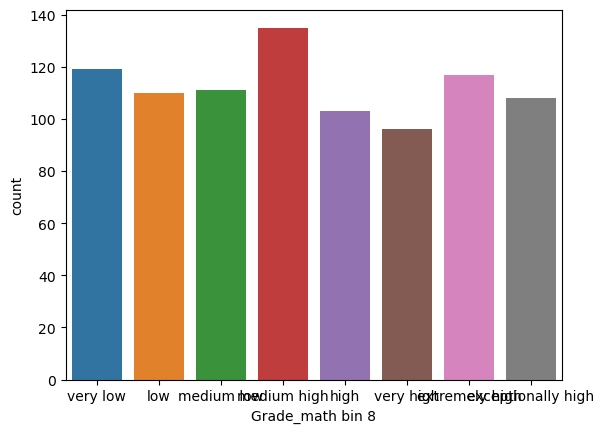

In [13]:
sns.countplot(x='Grade_math bin 8', data=df)

<AxesSubplot:xlabel='Grade_reading 1 bin', ylabel='count'>

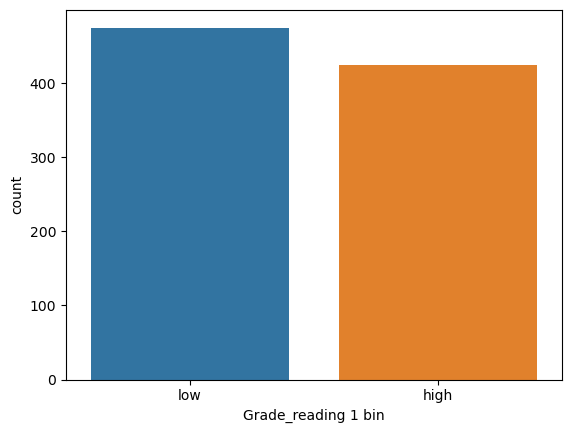

In [14]:
sns.countplot(x='Grade_reading 1 bin', data=df)

<AxesSubplot:xlabel='Grade_reading 4 bin', ylabel='count'>

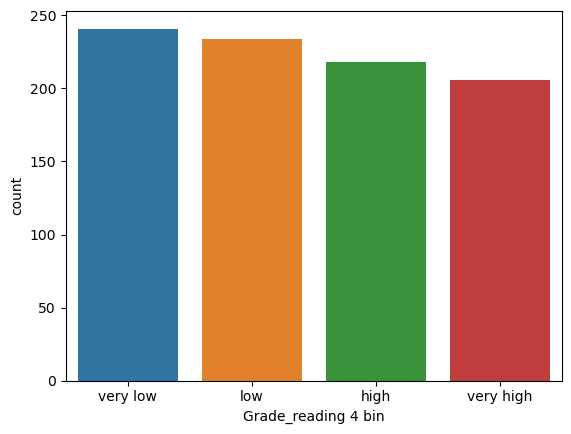

In [15]:
sns.countplot(x='Grade_reading 4 bin', data=df)

<AxesSubplot:xlabel='Grade_reading 8 bin', ylabel='count'>

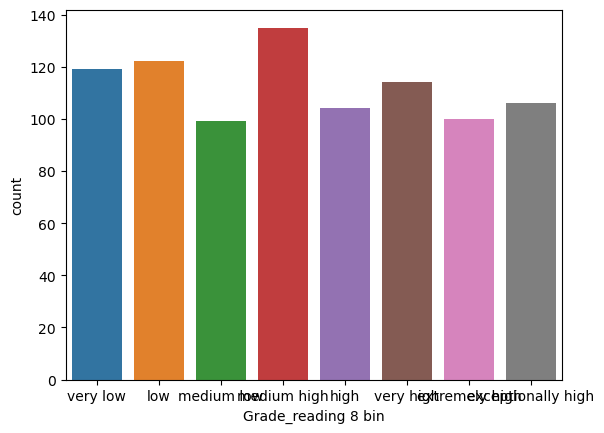

In [16]:
sns.countplot(x='Grade_reading 8 bin', data=df)

<AxesSubplot:xlabel='Grade_writing 1 bin', ylabel='count'>

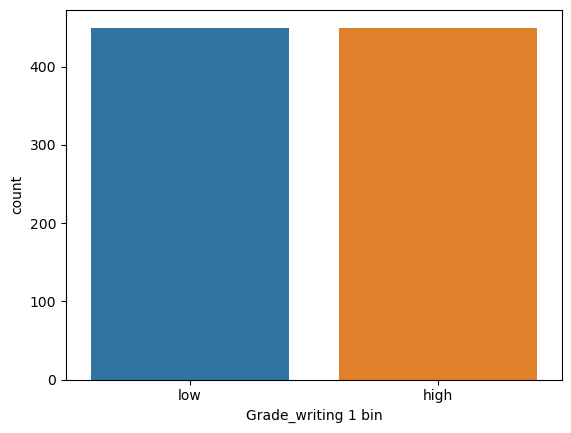

In [17]:
sns.countplot(x='Grade_writing 1 bin', data=df)

<AxesSubplot:xlabel='Grade_writing 4 bin', ylabel='count'>

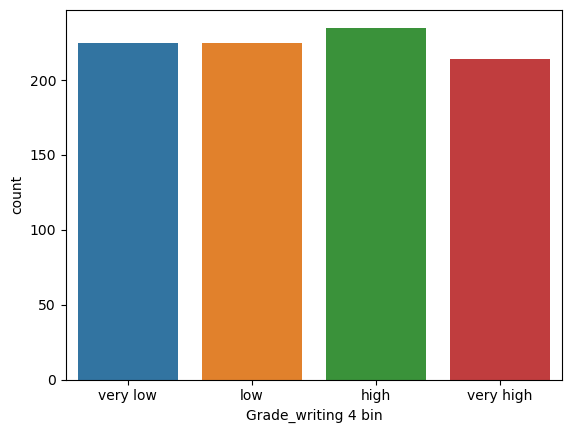

In [18]:
sns.countplot(x='Grade_writing 4 bin', data=df)

<AxesSubplot:xlabel='Grade_writing 8 bin', ylabel='count'>

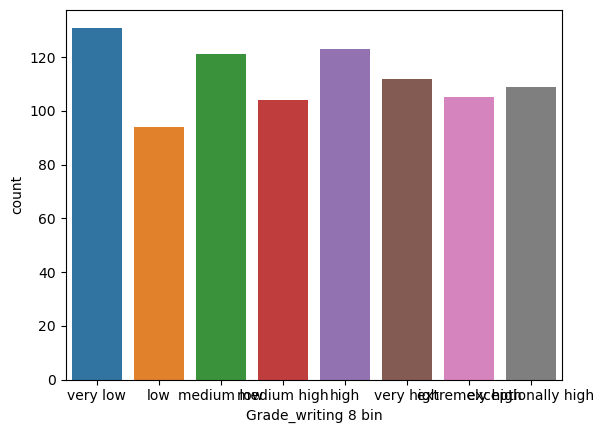

In [19]:
sns.countplot(x='Grade_writing 8 bin', data=df)

In [20]:
def Grade(marks):
    if marks >= 90:
        grade = 'A'
    elif marks >= 80:
        grade = 'B'
    elif marks >= 70:
        grade = 'C'
    elif marks >= 60:
        grade = 'D'
    elif marks >= 50:
        grade = 'E'
    else:
        grade = 'F'
    return grade
        
        
df["Grade_math"] = df["math score"].apply(lambda s: Grade(s))
df["Grade_reading"] = df["reading score"].apply(lambda s: Grade(s))
df["Grade_writing"] = df["writing score"].apply(lambda s: Grade(s))
df["Overall_grade"] = df["Percentage"].apply(lambda s: Grade(s))
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total marks,Percentage,...,Grade_reading 1 bin,Grade_reading 4 bin,Grade_reading 8 bin,Grade_writing 1 bin,Grade_writing 4 bin,Grade_writing 8 bin,Grade_math,Grade_reading,Grade_writing,Overall_grade
0,female,group D,some high school,free/reduced,none,57,76,69,202,67.333333,...,high,high,very high,high,high,high,E,C,D,D
2,female,group C,some college,standard,none,66,67,66,199,66.333333,...,low,low,medium high,low,low,medium high,D,D,D,D
3,female,group E,high school,standard,none,61,73,74,208,69.333333,...,high,high,high,high,high,very high,D,C,C,D
4,male,group A,some high school,standard,none,48,44,45,137,45.666667,...,low,very low,very low,low,very low,very low,F,F,F,F
5,male,group E,some high school,standard,none,92,84,77,253,84.333333,...,high,very high,extremely high,high,high,very high,A,B,C,B


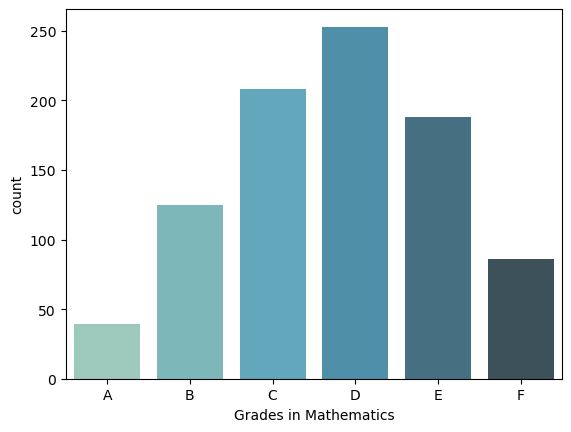

In [21]:
order_grade = ["A","B","C","D","E","F"]
sns.countplot(x = "Grade_math", data = df, order = order_grade, palette = "GnBu_d")
_ = plt.xlabel("Grades in Mathematics")

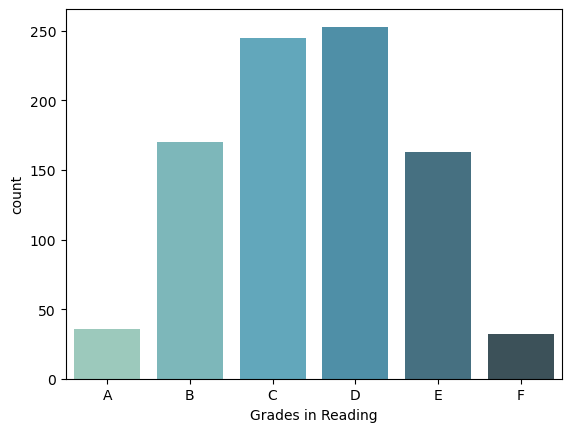

In [22]:
order_grade = ["A","B","C","D","E","F"]
sns.countplot(x = "Grade_reading", data = df, order = order_grade, palette = "GnBu_d")
_ = plt.xlabel("Grades in Reading")

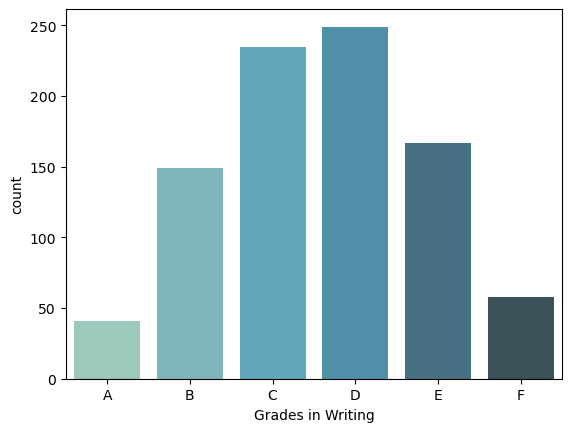

In [23]:
order_grade = ["A","B","C","D","E","F"]
sns.countplot(x = "Grade_writing", data = df, order = order_grade, palette = "GnBu_d")
_ = plt.xlabel("Grades in Writing")

Two methods for binning were investigated, the first one was quantile binning, which divided each grade into 2, 4, and 8 categories, and in the second method, based on the grades, we placed each grade in a group between A to F and we reached the conclusion by observing the boxplot diagram. More information can be obtained using the second method

# visualizing the data

### Maths Score:

<AxesSubplot:xlabel='math score', ylabel='count'>

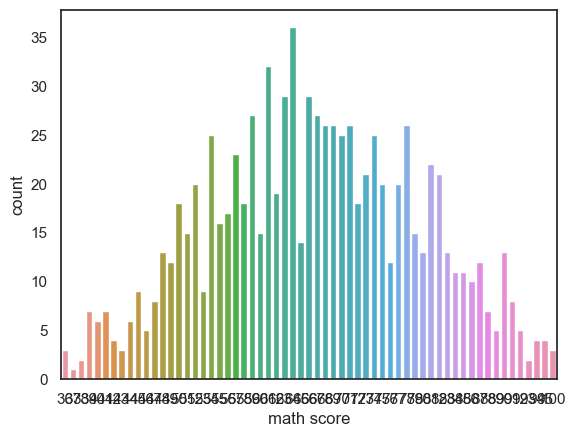

In [24]:
sns.set(style = "white")
sns.countplot(x = "math score", data = df)

### Reading Score:

<AxesSubplot:xlabel='reading score', ylabel='count'>

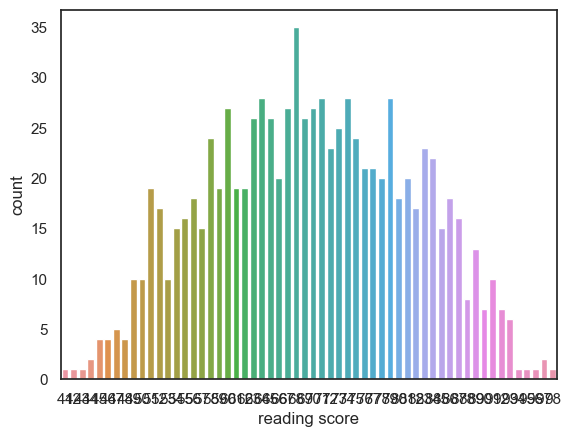

In [25]:
sns.countplot(x = "reading score", data = df)

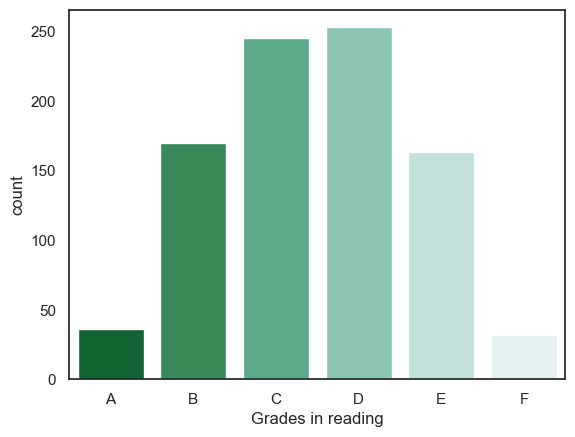

In [26]:
sns.countplot(x= "Grade_reading",data = df, order = order_grade, palette = "BuGn_r")
_ = plt.xlabel("Grades in reading")

### Writing Score:

<AxesSubplot:xlabel='writing score', ylabel='count'>

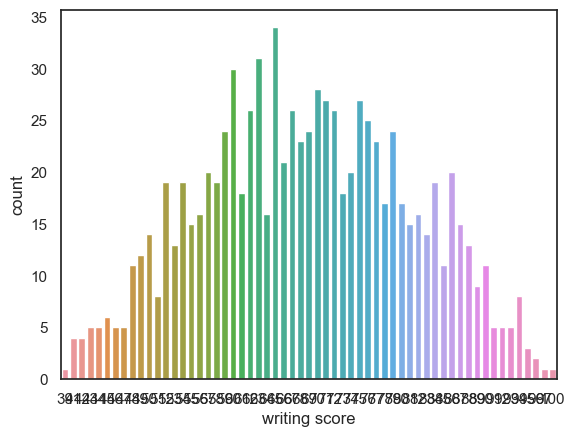

In [27]:
sns.countplot(x = "writing score", data = df)

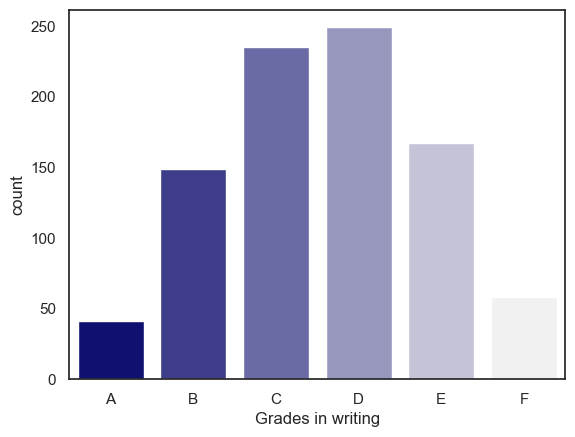

In [28]:
sns.countplot(x = "Grade_writing", data = df, order = order_grade, palette = sns.light_palette("navy", reverse=True))
_ = plt.xlabel("Grades in writing")

### Overall score

<AxesSubplot:xlabel='Percentage', ylabel='count'>

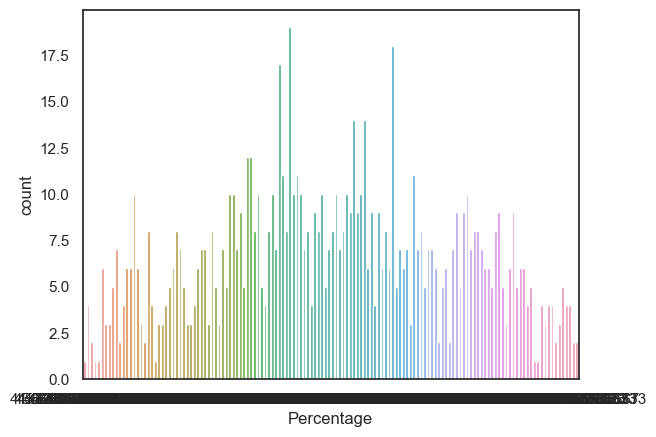

In [29]:
sns.countplot(x = "Percentage", data = df)

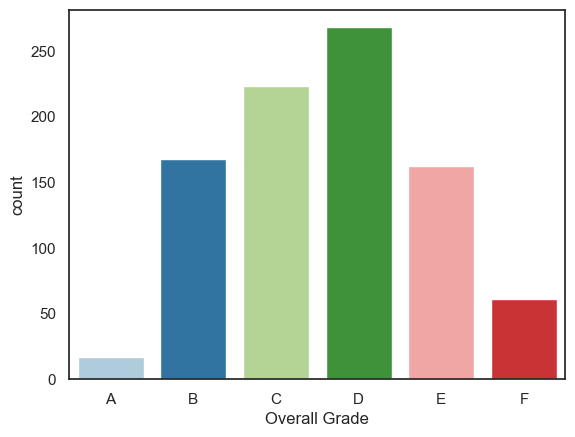

In [30]:
sns.countplot(x = 'Overall_grade', order = order_grade, data = df, palette = 'Paired')
_ = plt.xlabel("Overall Grade")

# correlation

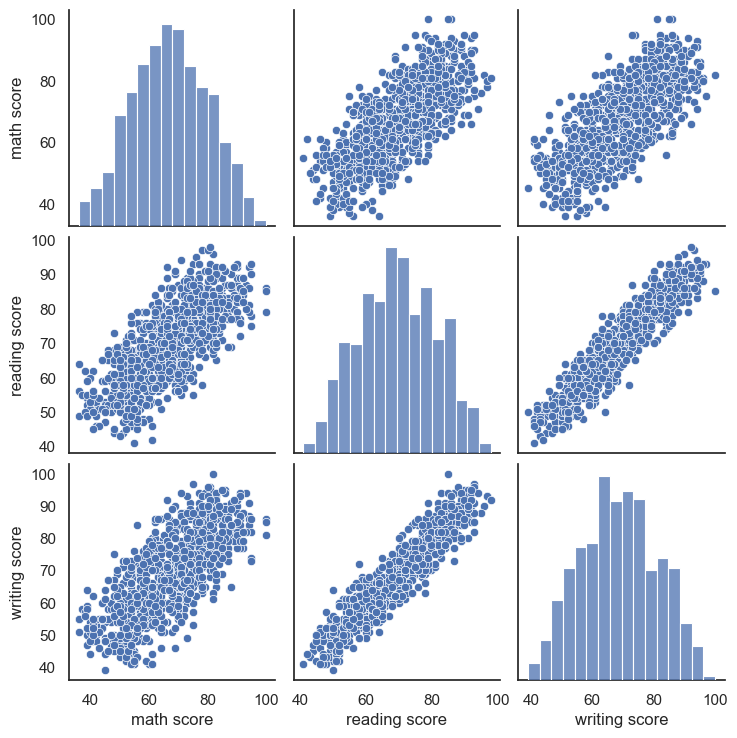

In [31]:
# Pair plot of scores and factors
sns.pairplot(df, vars=['math score', 'reading score', 'writing score'],kind='scatter')
plt.show()


### reading score and writing score are related

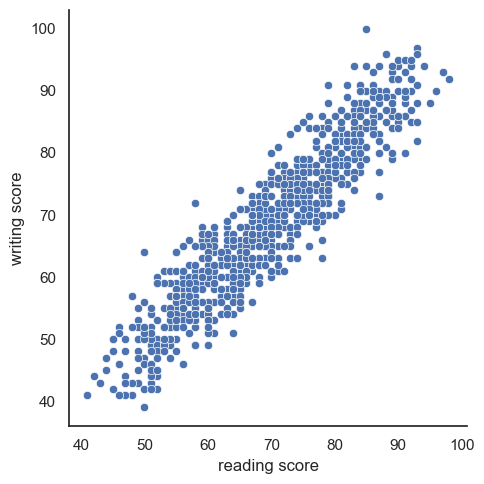

In [32]:
sns.relplot(x='reading score', y = 'writing score', data = df)

#### reading score and writing score are linearly related

In [33]:
r = np.corrcoef(df["reading score"], df["writing score"])[0, 1]
print(r)

0.9284385754179384


# influence of different factors on students performance

### gender

<AxesSubplot:xlabel='gender', ylabel='Percentage'>

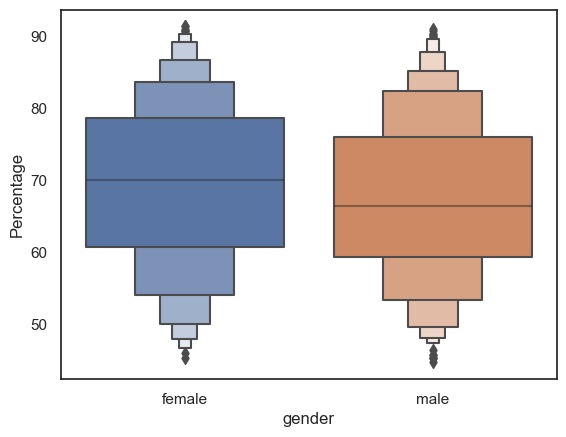

In [34]:
sns.boxenplot(x="gender", y="Percentage", data=df)

<AxesSubplot:xlabel='gender', ylabel='Percentage'>

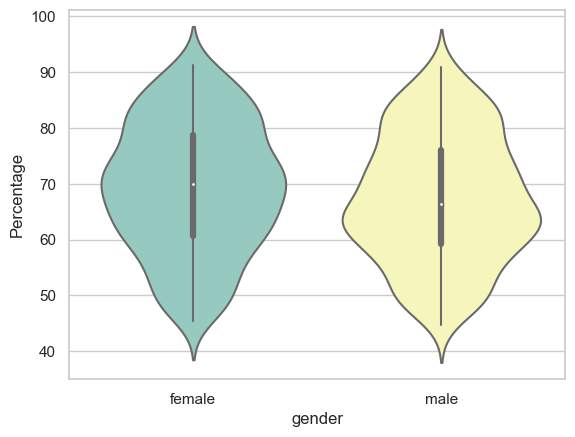

In [35]:
sns.set(style = "whitegrid")
sns.violinplot(x= 'gender', y = 'Percentage', data = df, palette = "Set3")

<AxesSubplot:xlabel='gender', ylabel='count'>

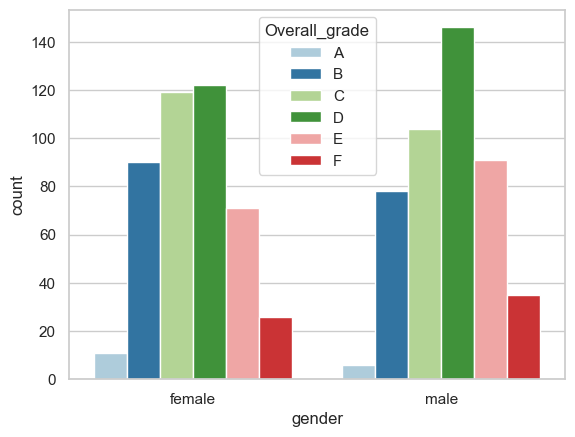

In [36]:
sns.countplot(x = "gender", data = df, hue = "Overall_grade", hue_order = ["A","B","C","D","E","F"], palette = "Paired")

### Race / Ethnicity:

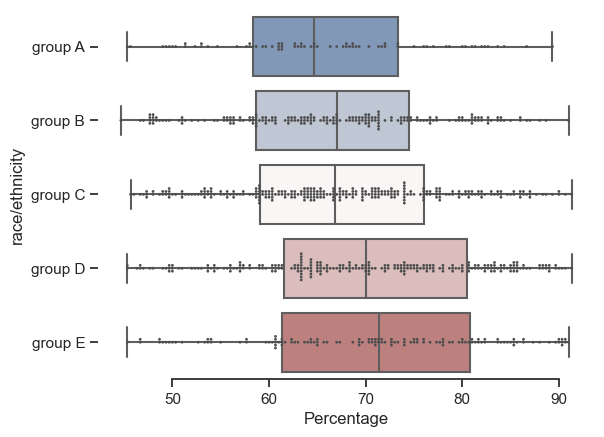

In [37]:
sns.set(style = "ticks")
order_race = ["group A","group B", "group C", "group D", "group E"]
sns.boxplot(x = "Percentage", y = "race/ethnicity", data = df, palette = "vlag", order = order_race)
sns.swarmplot(x = "Percentage", y = "race/ethnicity", data = df, size = 2, color = ".3", linewidth = 0, order = order_race)
sns.despine(trim = True, left = True)

<AxesSubplot:xlabel='race/ethnicity', ylabel='Percentage'>

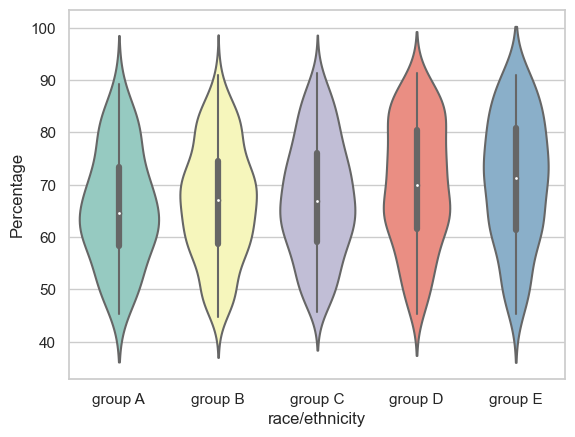

In [38]:
sns.set(style = "whitegrid")
sns.violinplot(x= 'race/ethnicity', y = 'Percentage', data = df, palette = "Set3", order = order_race)

#### students of group E are scored very well among the ethnicity groups

### Lunch:

<AxesSubplot:xlabel='lunch', ylabel='Percentage'>

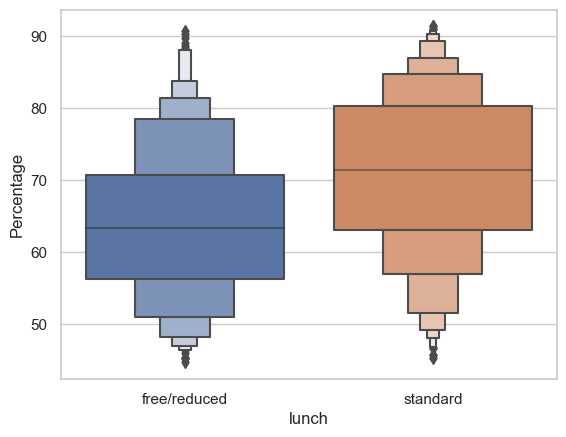

In [39]:
sns.boxenplot(x="lunch", y="Percentage", data=df)

#### students with standard lunch scored better than the others

In [40]:
# sns.countplot(x = "lunch", data = df, hue = "Overall_grade", hue_order = ["A","B","C","D","E","F"], palette = "Paired")

### Test preparation course:

<AxesSubplot:xlabel='test preparation course', ylabel='Percentage'>

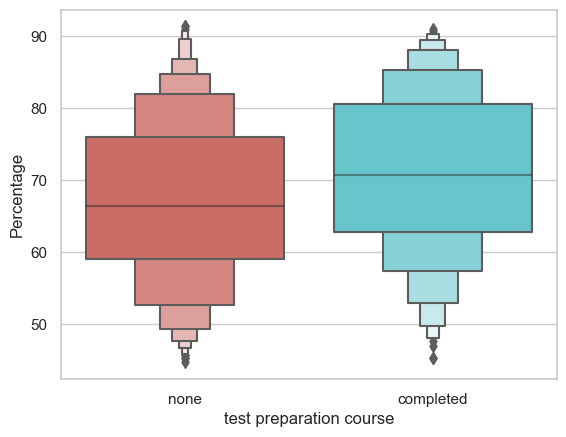

In [41]:
sns.boxenplot(x='test preparation course', y='Percentage',data = df, palette = "hls")

#### students who had completed their test preparation course scored better than the others

In [42]:
# sns.countplot(x = "test preparation course", hue = "Overall_grade",data = df, hue_order = order_grade, palette = 'Paired')
# _ = plt.legend()

### Parental level of education:

In [43]:
# order_edu = ['some high school','high school',"associate's degree","some college","bachelor's degree","master's degree"]
# p = sns.countplot(x='parental level of education', hue='Overall_grade',data=df, order= order_edu, hue_order = order_grade, palette = 'Paired')
# _ = plt.xlabel('Parents level of education')
# _ = plt.setp(p.get_xticklabels(), rotation = 60)

In [44]:
q = sns.violinplot(x="parental level of education", y="Percentage", data = df, order = order_edu,palette = "Paired")
_ = plt.setp(q.get_xticklabels(), rotation = 60)

NameError: name 'order_edu' is not defined

#### the student's whose parents have master's degree performed better than others

# Distribution of scores by column for each test score

In [45]:
features = ["gender","race/ethnicity","parental level of education","lunch",'test preparation course']

score_column = ["math score","reading score","writing score","Percentage"]
def bias_col_scr(scr_type):
    fig, ax = plt.subplots(2, 3, figsize=(20,8))
    for i, feature in enumerate(features):
        row = i // 3
        col = i % 3
        sns.kdeplot(df[scr_type], color='#e35f62', shade=True, label="score", ax=ax[row][col])
        for value in df[feature].value_counts().index:
            sns.kdeplot(df[df[feature] == value][scr_type], shade=True, label=value, ax=ax[row][col])
        ax[row][col].legend()
        ax[row][col].set_title("distribution of <"+scr_type+"> by |-"+feature)

    plt.show()

<< math score >>


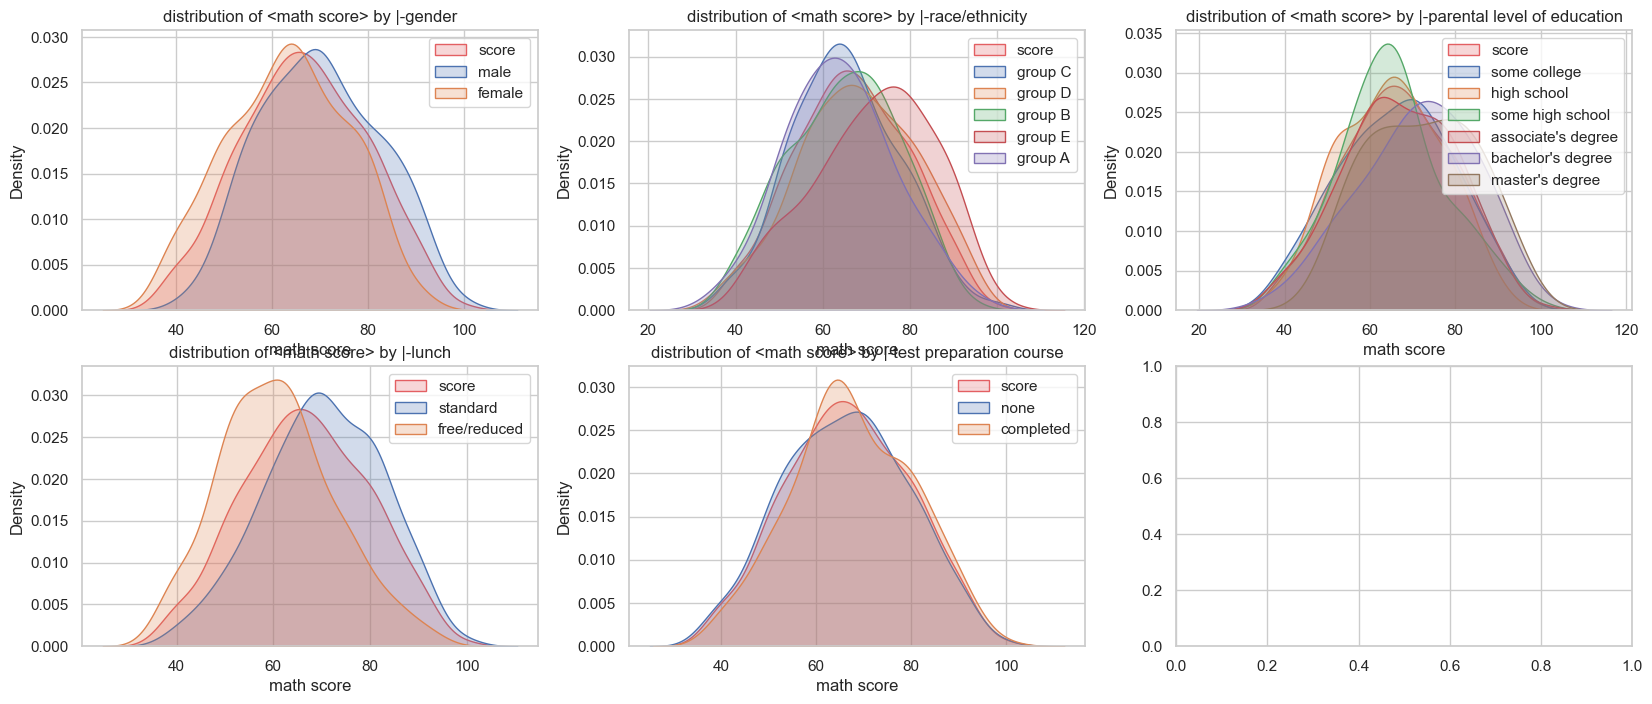

<< reading score >>


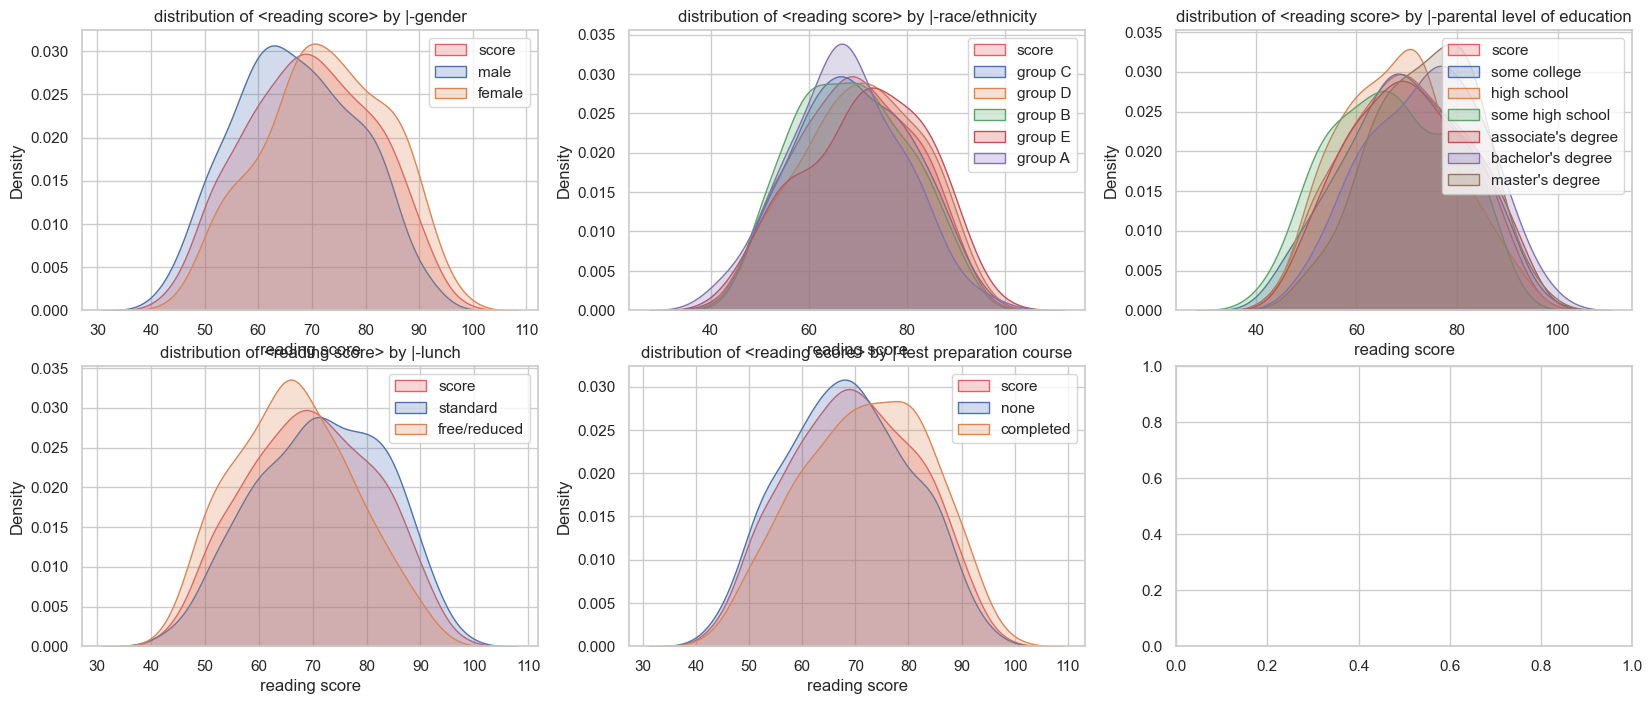

<< writing score >>


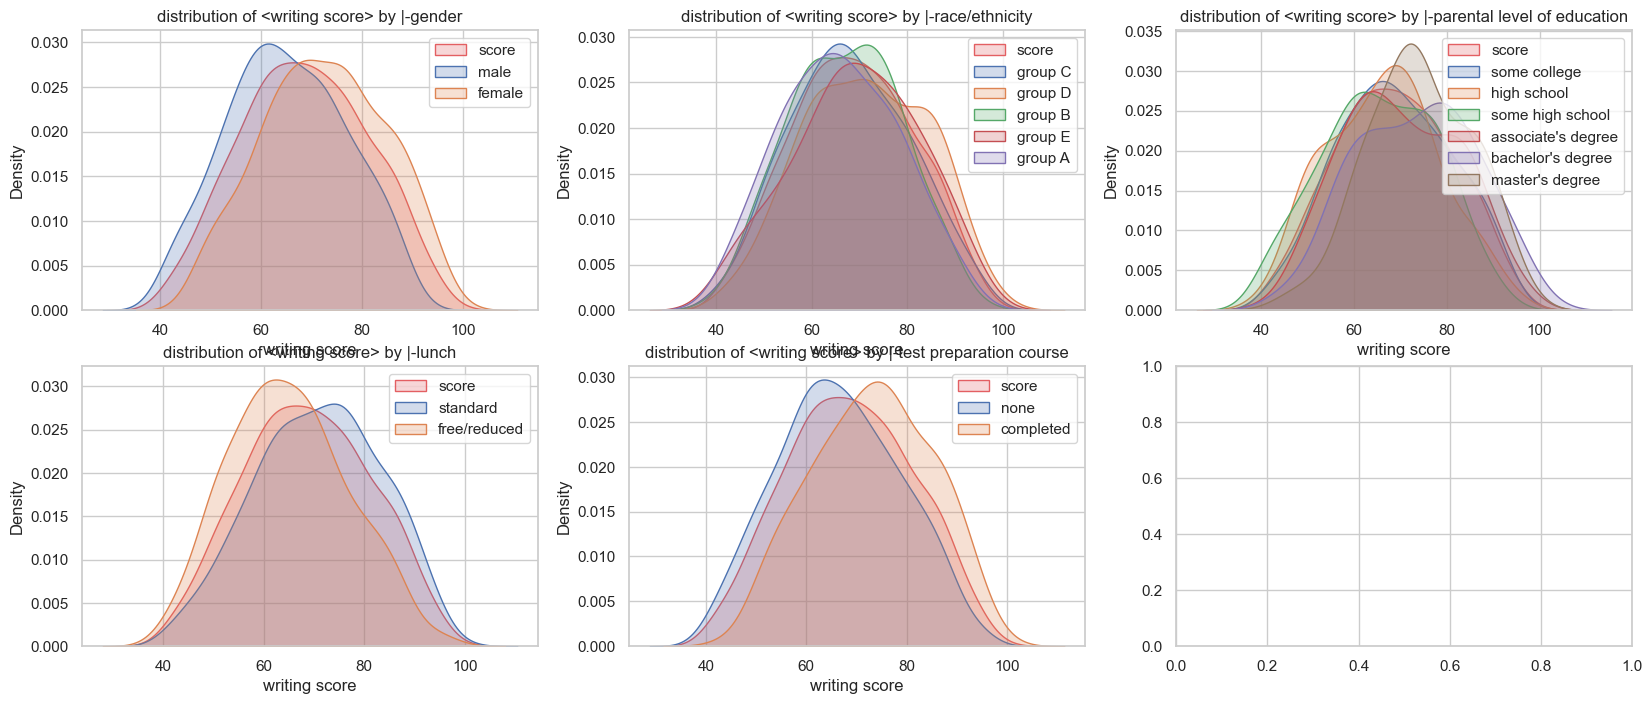

<< Percentage >>


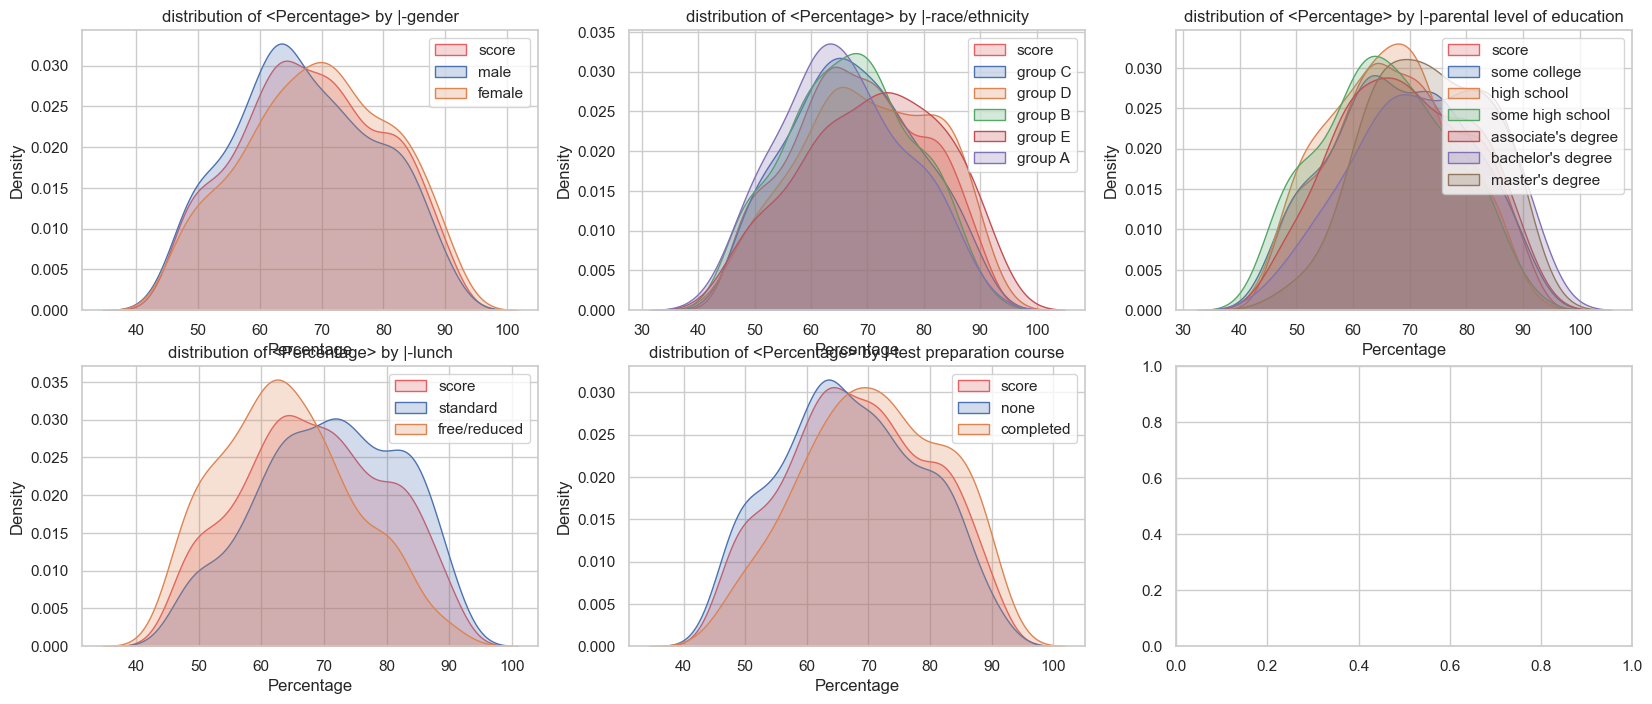

In [46]:
for i in score_column:
    print("<<",i,">>")
    bias_col_scr(i)

# Analysis and visualization of score types for each column

<< math score >>

< gender >
male :  70.01739130434783
female :  63.216400911161735

< race/ethnicity >
group C :  65.10740740740741
group D :  68.1344537815126
group B :  64.8586387434555
group E :  71.77952755905511
group A :  63.84931506849315

< parental level of education >
some college :  66.14782608695653
high school :  64.81666666666666
some high school :  65.10227272727273
associate's degree :  66.99404761904762
bachelor's degree :  71.09677419354838
master's degree :  72.1923076923077

< lunch >
standard :  70.19929453262786
free/reduced :  60.713855421686745

< test preparation course >
none :  66.21297836938436
completed :  67.67114093959732


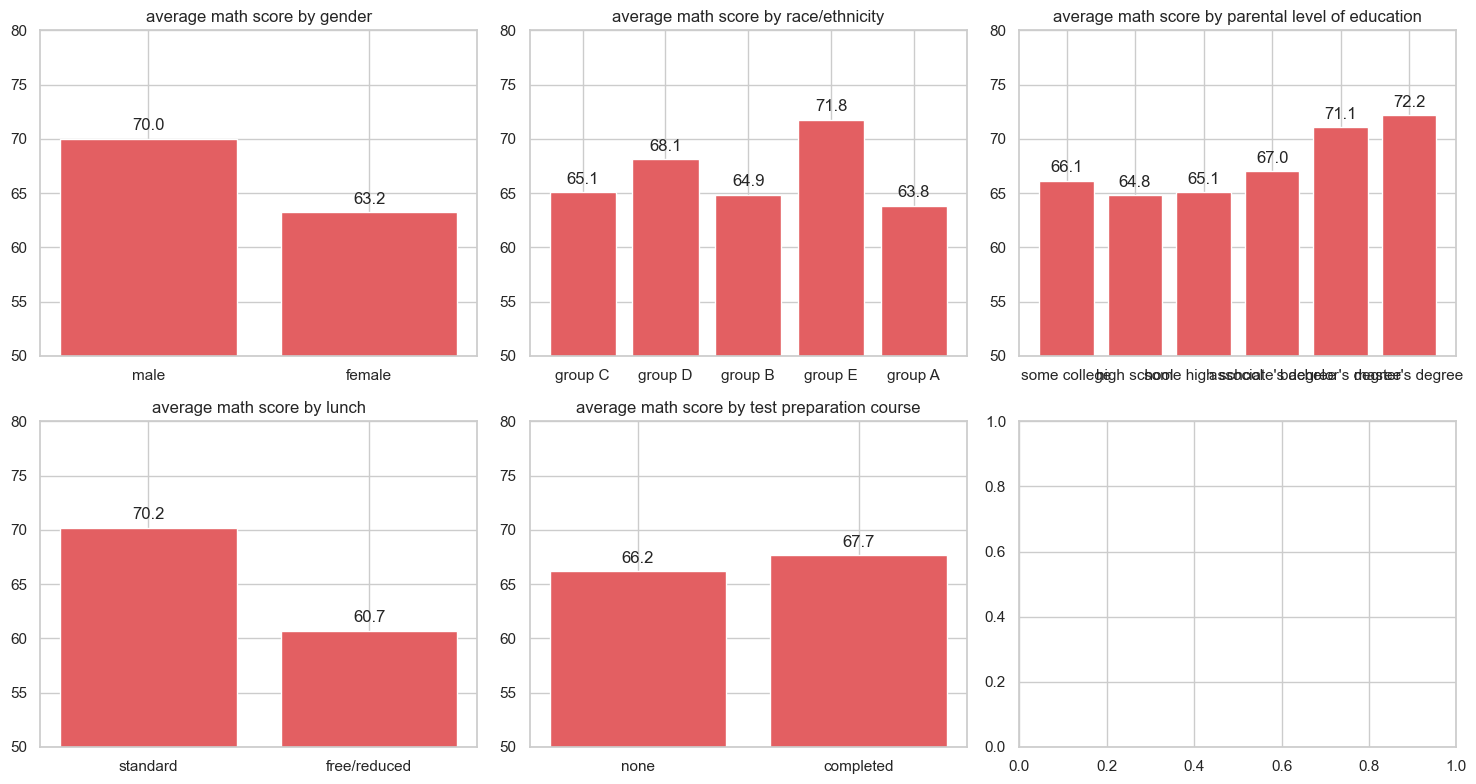

<< reading score >>

< gender >
male :  67.08695652173913
female :  72.40546697038724

< race/ethnicity >
group C :  69.33333333333333
group D :  70.70588235294117
group B :  68.59685863874346
group E :  71.39370078740157
group A :  67.52054794520548

< parental level of education >
some college :  69.87391304347825
high school :  68.11666666666666
some high school :  66.99431818181819
associate's degree :  70.5297619047619
bachelor's degree :  73.59139784946237
master's degree :  73.65384615384616

< lunch >
standard :  71.55379188712521
free/reduced :  66.49096385542168

< test preparation course >
none :  68.5973377703827
completed :  71.8758389261745


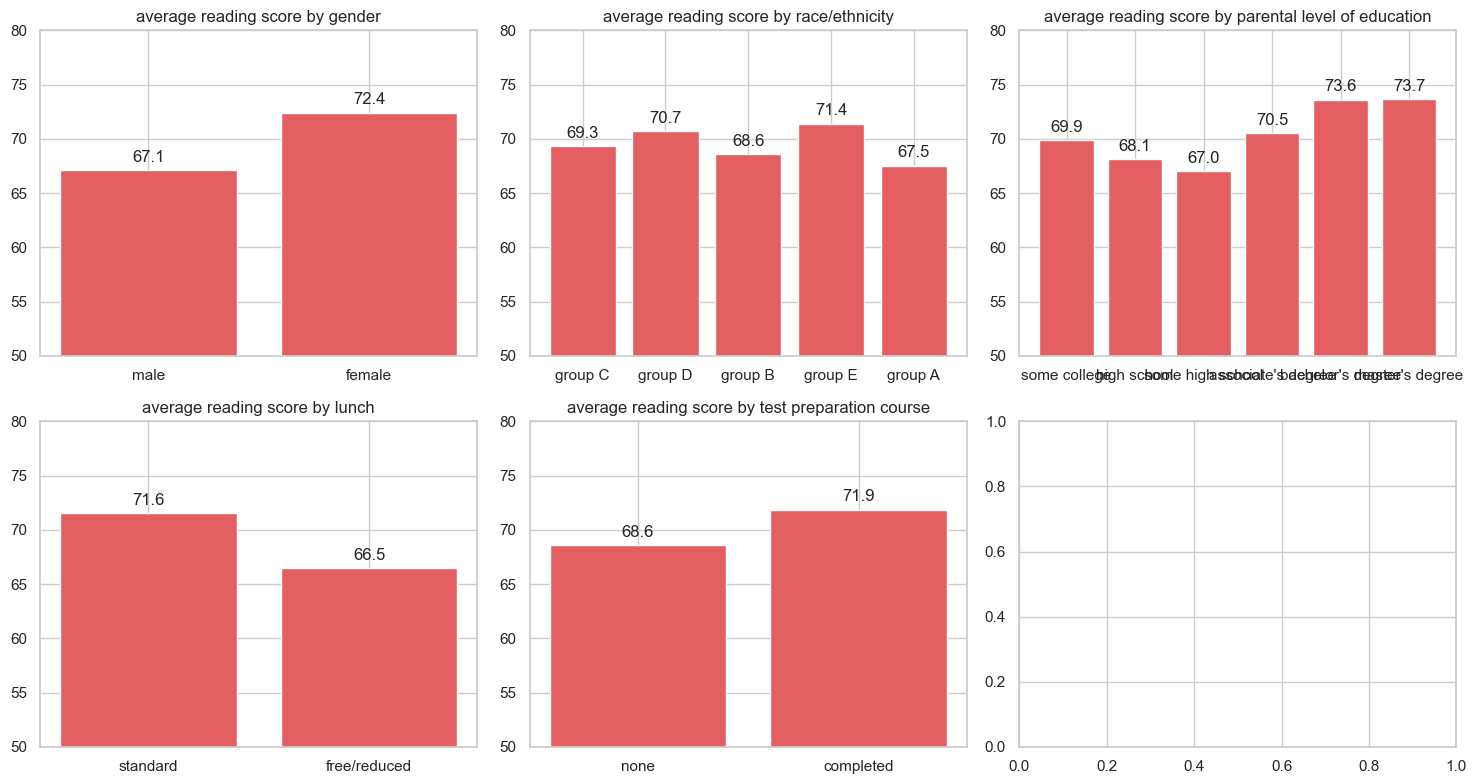

<< writing score >>

< gender >
male :  65.07391304347826
female :  72.35763097949886

< race/ethnicity >
group C :  67.89259259259259
group D :  71.25630252100841
group B :  67.0261780104712
group E :  69.2755905511811
group A :  65.87671232876713

< parental level of education >
some college :  68.77391304347826
high school :  66.22222222222223
some high school :  65.50568181818181
associate's degree :  70.04166666666667
bachelor's degree :  73.29032258064517
master's degree :  74.01923076923077

< lunch >
standard :  70.79012345679013
free/reduced :  64.94277108433735

< test preparation course >
none :  66.46089850249584
completed :  73.00671140939598


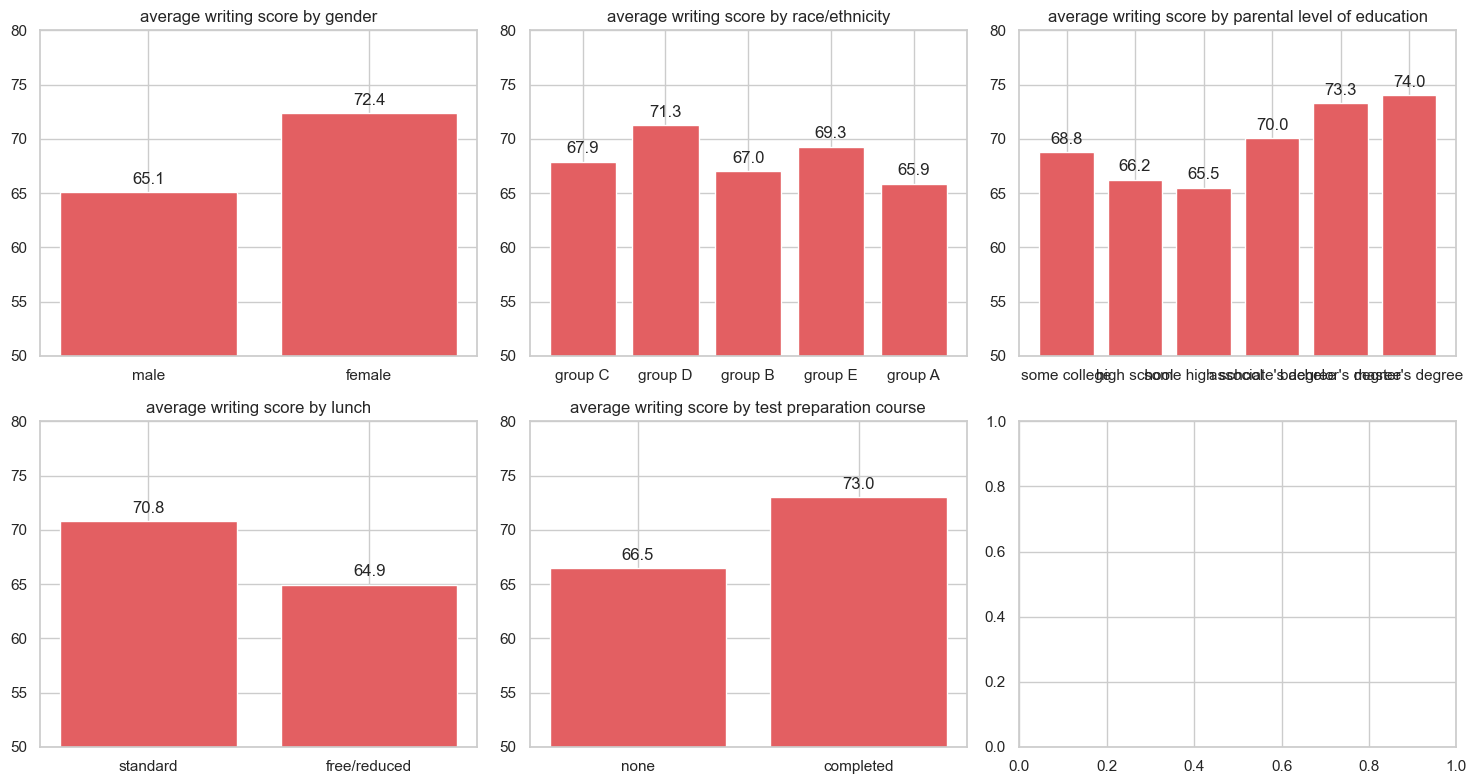

<< Percentage >>

< gender >
male :  67.3927536231884
female :  69.32649962034928

< race/ethnicity >
group C :  67.44444444444443
group D :  70.03221288515408
group B :  66.82722513089006
group E :  70.81627296587929
group A :  65.74885844748859

< parental level of education >
some college :  68.26521739130435
high school :  66.38518518518518
some high school :  65.86742424242425
associate's degree :  69.18849206349208
bachelor's degree :  72.6594982078853
master's degree :  73.28846153846153

< lunch >
standard :  70.8477366255144
free/reduced :  64.04919678714859

< test preparation course >
none :  67.0904048807543
completed :  70.85123042505592


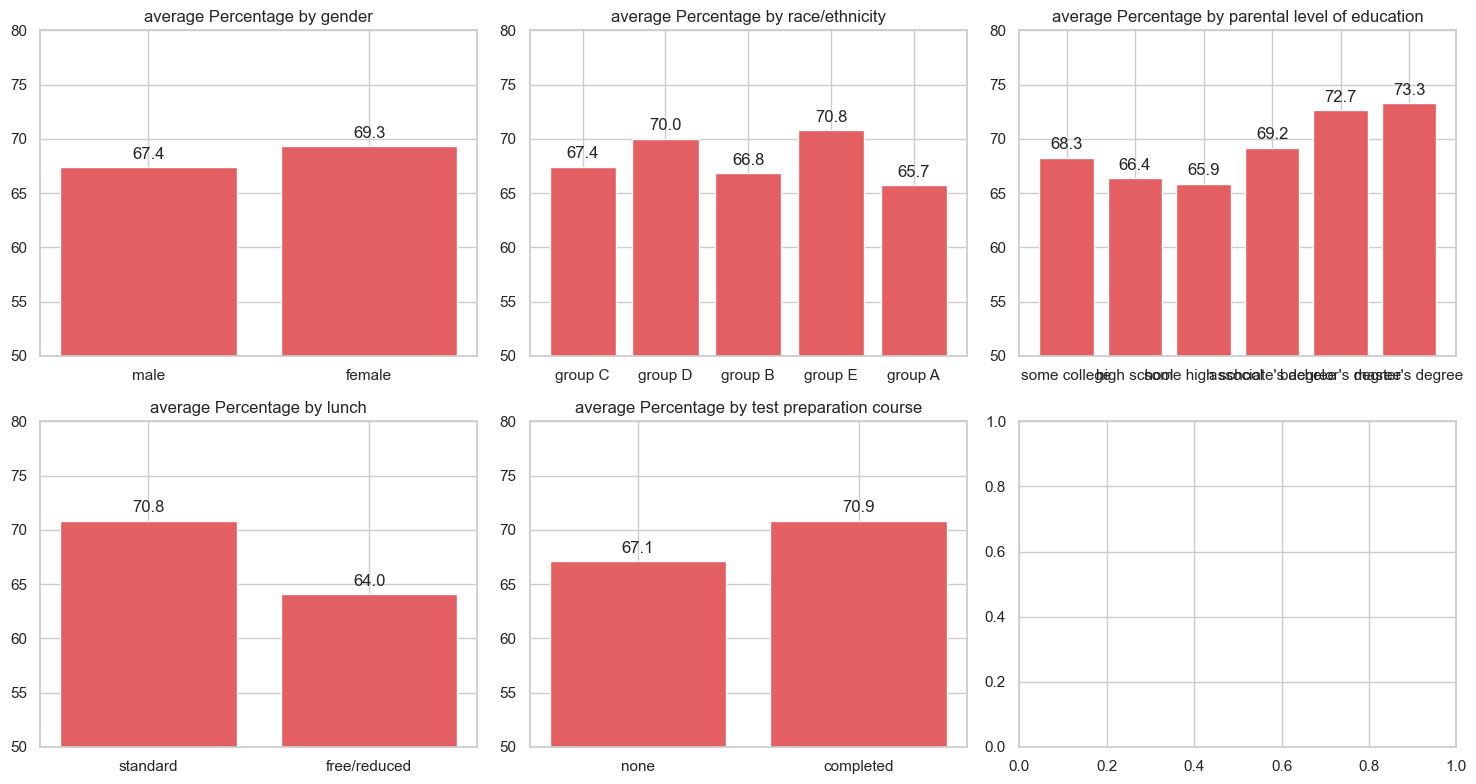

In [47]:
features = ["gender","race/ethnicity","parental level of education","lunch",'test preparation course']


def bias_col_scr_2(scr_type):
    fig, ax = plt.subplots(2, 3, figsize=(15,8))
    ax = ax.flatten()
    for i, feature in enumerate(features):
        print("")
        print("<",feature,">")
        x = []
        y = []
        for j in df[feature].value_counts().index:
            print(j, ": ", np.mean(df[df[feature]==j][scr_type].values))
            x.append(j)
            y.append(np.mean(df[df[feature]==j][scr_type].values))
        plt.sca(ax[i])
        plt.bar(x, y, color='#e35f62')
        for b in range(len(x)):
            height = y[b]
            plt.text(x[b], height + 0.5, '%.1f' % height, ha='center', va='bottom', size=12)
        plt.ylim(50, 80)
        plt.title("average "+scr_type+" by "+feature)
    plt.tight_layout()
    plt.show()
for i in score_column:
    print("<<",i,">>")
    bias_col_scr_2(i)

# Check correlation with HeatMap

In [48]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total marks,Percentage,...,Grade_reading 1 bin,Grade_reading 4 bin,Grade_reading 8 bin,Grade_writing 1 bin,Grade_writing 4 bin,Grade_writing 8 bin,Grade_math,Grade_reading,Grade_writing,Overall_grade
0,female,group D,some high school,free/reduced,none,57,76,69,202,67.333333,...,high,high,very high,high,high,high,E,C,D,D
2,female,group C,some college,standard,none,66,67,66,199,66.333333,...,low,low,medium high,low,low,medium high,D,D,D,D
3,female,group E,high school,standard,none,61,73,74,208,69.333333,...,high,high,high,high,high,very high,D,C,C,D
4,male,group A,some high school,standard,none,48,44,45,137,45.666667,...,low,very low,very low,low,very low,very low,F,F,F,F
5,male,group E,some high school,standard,none,92,84,77,253,84.333333,...,high,very high,extremely high,high,high,very high,A,B,C,B


### standardization of data

In [49]:
data = df[['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course',
 'math score',
 'reading score',
 'writing score',
 'Total marks',
 'Percentage',]].copy()


# gender
sex_mapping = {"male":0,"female":1}

#race/ethnicity
group_mapping = {"group A":0.2,"group B":0.4,"group C":0.6,"group D":0.8,"group E":1}

#parental level of education
degree_mapping = {"some college":0.4,
                  "associate's degree":0.6,
                  "high school":0,
                  "some high school":0.2,
                  "bachelor's degree":0.8,
                  "master's degree":1}

# lunch
lunch_mapping = {"standard":1,
                "free/reduced":0}

# test preparation course
course_mapping = {"none":0,
                 "completed":1}



data["gender"] = data["gender"].map(sex_mapping)
data["race/ethnicity"] = data["race/ethnicity"].map(group_mapping)
data["parental level of education"] = data["parental level of education"].map(degree_mapping)
data["lunch"] = data["lunch"].map(lunch_mapping)
data["test preparation course"] = data["test preparation course"].map(course_mapping)
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total marks,Percentage
0,1,0.8,0.2,0,0,57,76,69,202,67.333333
2,1,0.6,0.4,1,0,66,67,66,199,66.333333
3,1,1.0,0.0,1,0,61,73,74,208,69.333333
4,0,0.2,0.2,1,0,48,44,45,137,45.666667
5,0,1.0,0.2,1,0,92,84,77,253,84.333333


In [70]:
d_m = []
d_r = []
d_w = []
d_s = []
for i in range(len(df)):
    d_m.append(df['math score'].values[i]/100)
    d_r.append(df['reading score'].values[i]/100)
    d_w.append(df['writing score'].values[i]/100)
    d_s.append(df['Percentage'].values[i]/100)
data['math score'] = d_m
data['reading score'] = d_r
data['writing score'] = d_w
data['Percentage'] = d_s
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total marks,Percentage
0,1,0.8,0.2,0,0,0.57,0.76,0.69,202,0.673333
2,1,0.6,0.4,1,0,0.66,0.67,0.66,199,0.663333
3,1,1.0,0.0,1,0,0.61,0.73,0.74,208,0.693333
4,0,0.2,0.2,1,0,0.48,0.44,0.45,137,0.456667
5,0,1.0,0.2,1,0,0.92,0.84,0.77,253,0.843333


<AxesSubplot:title={'center':'Correlation of Features'}>

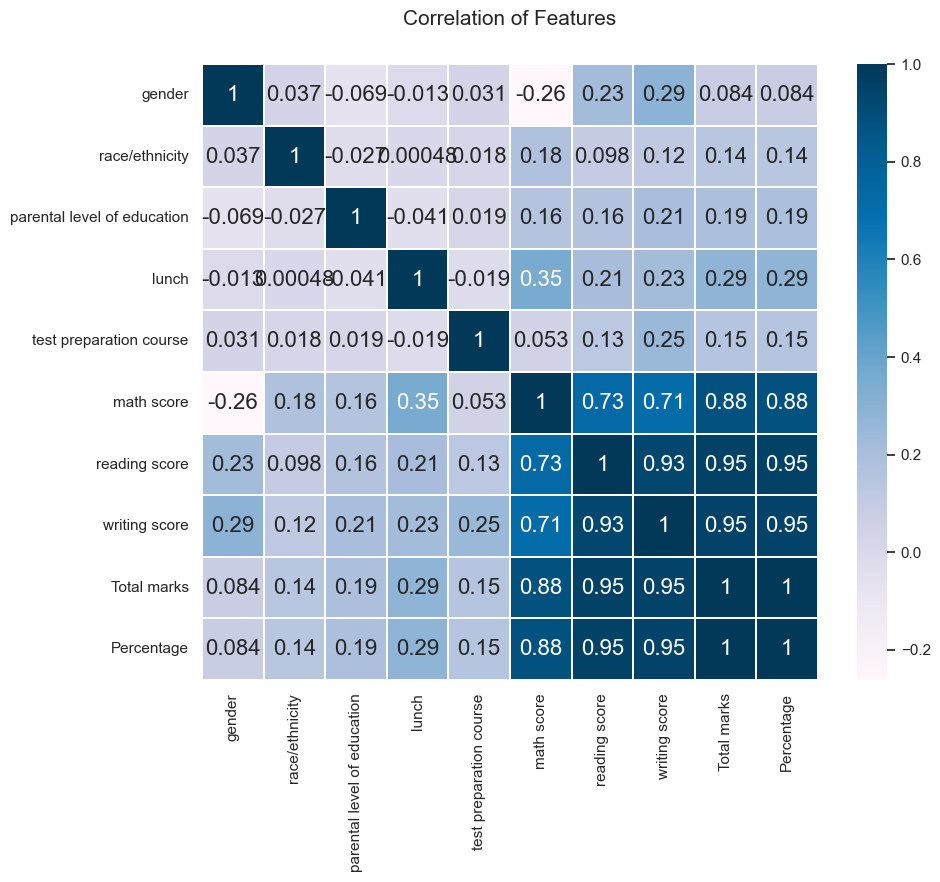

In [71]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("Correlation of Features", y = 1.05, size = 15)
sns.heatmap(data.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

# machine learning

In [72]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total marks,Percentage
0,1,0.8,0.2,0,0,0.57,0.76,0.69,202,0.673333
2,1,0.6,0.4,1,0,0.66,0.67,0.66,199,0.663333
3,1,1.0,0.0,1,0,0.61,0.73,0.74,208,0.693333
4,0,0.2,0.2,1,0,0.48,0.44,0.45,137,0.456667
5,0,1.0,0.2,1,0,0.92,0.84,0.77,253,0.843333


In [73]:
len(data)

899

### add column pass_or_not

In [84]:
data["pass_or_not"] = data["Percentage"].apply(lambda x: 1 if x >= 0.6 else 0)
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total marks,Percentage,pass_or_not
0,1,0.8,0.2,0,0,0.57,0.76,0.69,202,0.673333,1
2,1,0.6,0.4,1,0,0.66,0.67,0.66,199,0.663333,1
3,1,1.0,0.0,1,0,0.61,0.73,0.74,208,0.693333,1
4,0,0.2,0.2,1,0,0.48,0.44,0.45,137,0.456667,0
5,0,1.0,0.2,1,0,0.92,0.84,0.77,253,0.843333,1


### Split data and target

In [85]:
split_x = data[data.columns[:5]]
split_x.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,1,0.8,0.2,0,0
2,1,0.6,0.4,1,0
3,1,1.0,0.0,1,0
4,0,0.2,0.2,1,0
5,0,1.0,0.2,1,0


In [86]:
split_y = data[data.columns[-1]]
split_y.head()

0    1
2    1
3    1
4    0
5    1
Name: pass_or_not, dtype: int64

In [87]:
X_train, X_test, y_train, y_test = train_test_split(split_x, split_y, test_size=0.4, shuffle=False, random_state=1004)

## Compare each model

### k-fold cross validation 

In [93]:
k_fold = KFold(n_splits = 7, shuffle=True, random_state = 0)

In [94]:
knn = KNeighborsClassifier(n_neighbors = 13) #KNN
dtc = DecisionTreeClassifier() # Decision Tree
rfc = RandomForestClassifier(n_estimators=13) #Random Forest
gnb = GaussianNB() # Naive Bayes
svc = SVC() #SVC
gbc = GradientBoostingClassifier()

# Machine learning model
clf_list = [knn,dtc,rfc,gnb,svc,gbc]

C:\Users\Sharif\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Sharif\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

<BarContainer object of 6 artists>

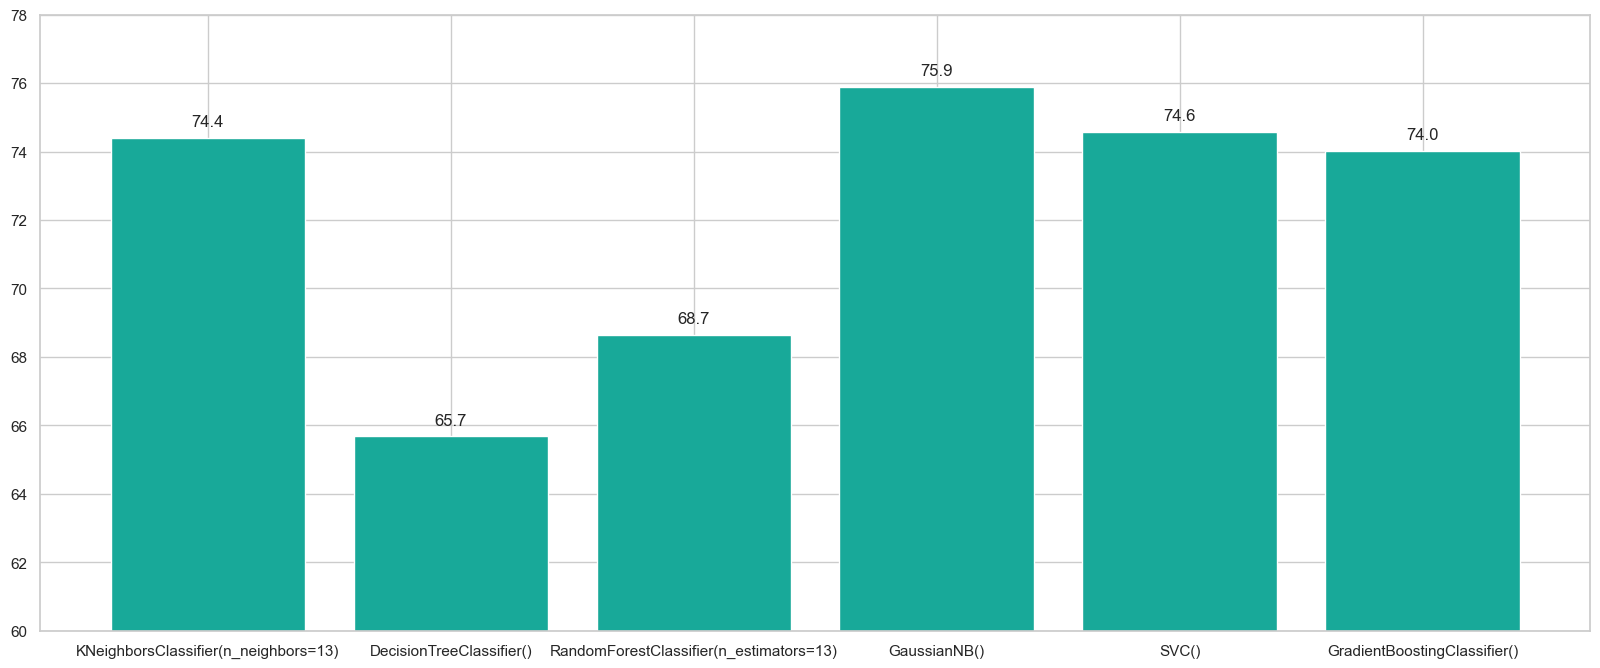

In [95]:
score_list = []
score_name = []
for model in clf_list:
        scoring = "accuracy"
        score = cross_val_score(model, X_train,y_train, cv=k_fold, n_jobs=1, scoring = scoring)
        score_name.append(str(model))
        score = round(np.mean(score)*100,2)
        score_list.append(score) 
        

plt.figure(figsize=(20,8))
x = score_name
y = score_list
for i in range(len(x)):
    height = y[i]
    plt.text(x[i], height + 0.25, '%.1f' %height, ha='center', va='bottom', size = 12)
plt.ylim(60,78)
plt.bar(x, y,color='#18a999')        

GaussianNB , SVC, KNN have highest score in machine learning models with default tuning

accuracy scores obtained from cross-validation shows GaussianNB , SVC, KNN have higher accuracy

C:\Users\Sharif\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Sharif\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

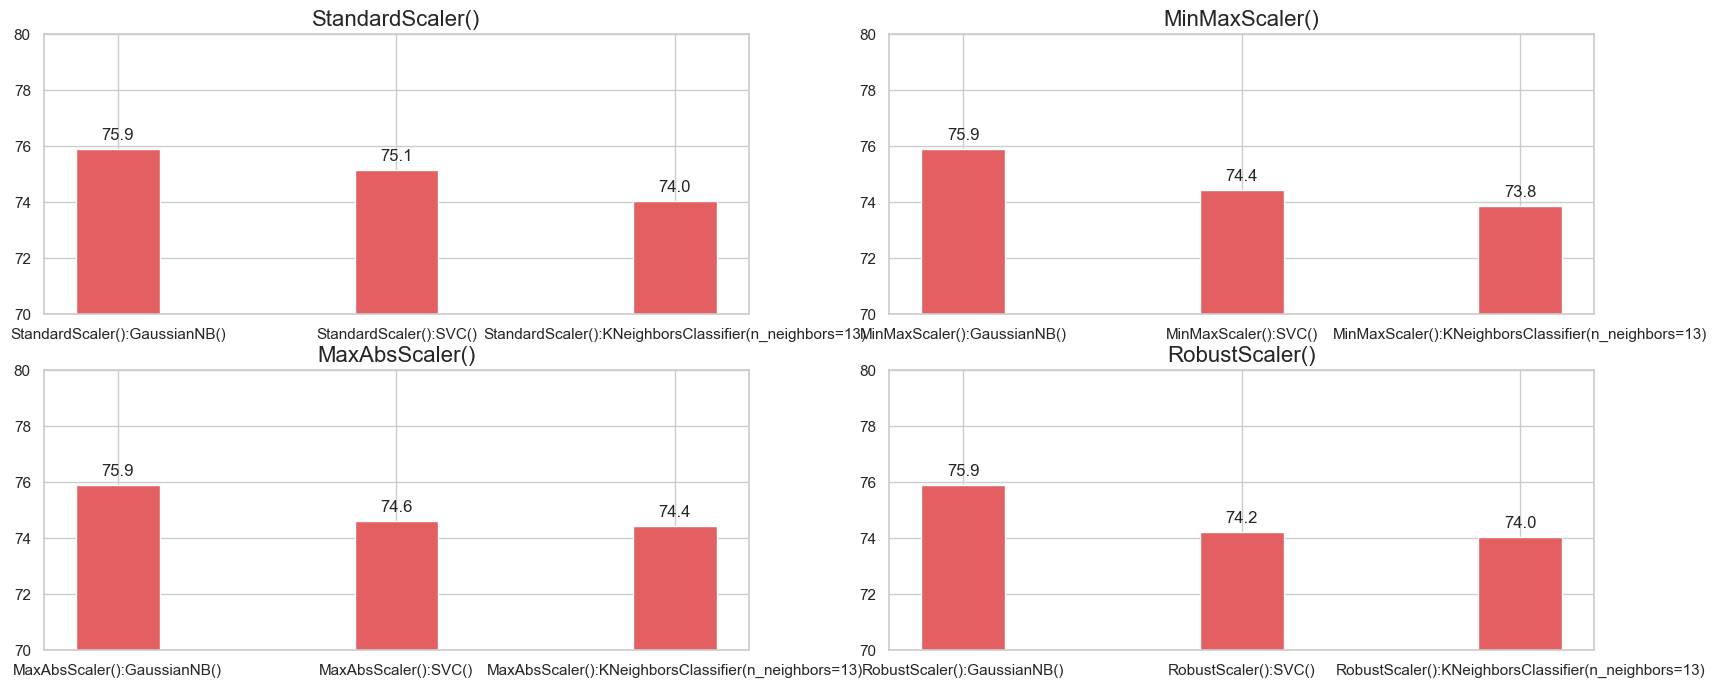

In [102]:
hg_score_name = []
hg_score_score = []
hg_model = [gnb,svc,knn]

# Scaling Model
ssc = StandardScaler()
mms = MinMaxScaler()
mas = MaxAbsScaler()
rsc = RobustScaler()

scl_list = [ssc,mms,mas,rsc]
for scl in scl_list:
    scl.fit(X_train)
    train_data = scl.transform(X_train)
    test_data = scl.transform(X_test)
    for mdl in hg_model:
        scoring = "accuracy"
        score = cross_val_score(mdl, train_data,y_train, cv=k_fold, n_jobs=1, scoring = scoring)
        hg_score_name.append(str(scl)+":"+str(mdl))
        score = round(np.mean(score)*100,2)

        hg_score_score.append(score) 
        
        
plt.figure(figsize=(20,8))

for i in range(4):
    plt.subplot(2,2,i+1)
    x = hg_score_name[(3*i):+(3*i)+3]
    y = hg_score_score[(3*i):+(3*i)+3]
    scaler_name = hg_score_name[3*i].split(':')[0]
    plt.title(scaler_name, fontsize=16) # Add title with scaler name
    for i in range(len(x)):
        height = y[i]
        plt.text(x[i], height + 0.25, '%.1f' %height, ha='center', va='bottom', size = 12)
    plt.ylim(70,80)
    plt.bar(x,y,color='#e35f62', width=0.3)
# for i in range(4):
#     plt.subplot(2,2,i+1)
#     x = hg_score_name[(3*i):+(3*i)+3]
#     y = hg_score_score[(3*i):+(3*i)+3]
#     for i in range(len(x)):
#         height = y[i]
#         plt.text(x[i], height + 0.25, '%.1f' %height, ha='center', va='bottom', size = 12)
#     plt.ylim(70,80)
#     plt.bar(x,y,color='#e35f62')  
    
    


As a result of scaling, it can be seen that the score of GNB is not significantly affected by the scaling model, but nevertheless obtains a high score. Although the SVC and KNN machine learning models were affected, it can be seen that both SVCs scored higher.

only the GNB and SVC models was an efficient method
Through the Data scaling, Got the same score in GNB Model. But get a score that increased by 0.2 points in SVC Model

# Find Out Optimal Parameter Value

## Gaussian Naive Bayes

There is different parameters between GaussianNB and SVC model. So using GridSearchCV to get the optimal value, but seperate into two part with model, set the parameter with meaningful keys by each model.

In [103]:
GaussianNB().get_params().keys()

dict_keys(['priors', 'var_smoothing'])

In [104]:
# Set Scaling Model
scl = RobustScaler()
scl.fit(X_train)
train_data = scl.transform(X_train)


In [107]:
priors_range = np.arange(0.1, 1, 0.001)
scores = []
# loop over the range of priors and evaluate the performance of the model using 5-fold cross-validation
for prior in priors_range:
    clf = GaussianNB(priors=[prior, 1-prior])
    cv_scores = cross_val_score(clf, train_data, y_train, cv=7)
    scores.append(np.mean(cv_scores))

# find the optimal prior that gives the highest cross-validation score
optimal_prior = priors_range[np.argmax(scores)]
print("Optimal prior: ",optimal_prior)
print("Optimal prior's Score: ",(round(max(scores),4)*100))

Optimal prior:  0.24800000000000014
Optimal prior's Score:  75.7


In [108]:
optimal_prior = 0.269
clf = GaussianNB(priors=[optimal_prior,1-optimal_prior])
score = cross_val_score(clf, train_data,y_train, cv=7, n_jobs=1, scoring = "accuracy")
score = round(np.mean(score)*100,2)
print(score)

74.95


In [109]:
clf.fit(X_train,y_train)
gnb_test_pred = clf.predict(X_test)
clf.score(X_test,y_test)

0.7555555555555555

## RandomForestClassifier

In [110]:
params = {
    'random_state':(0,10,20,30,50),
    'n_estimators':(10,30,50,100, 200),
    'max_depth' : (3,5, 8, 15),
    'min_samples_leaf' : (4, 8, 18, 20),
    'min_samples_split' : (4, 8, 16, 20)
}
rf_model = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_model, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('Optimal Hyperparameters:', grid_cv.best_params_)
print('Optimal prediction accuracy: {0:.4f}'.format(grid_cv.best_score_))

Optimal Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 20, 'n_estimators': 10, 'random_state': 20}
Optimal prediction accuracy: 0.7514


In [111]:
rf_model = RandomForestClassifier(n_estimators=30,random_state=50,max_depth=3,min_samples_leaf=8,min_samples_split=20)
rf_model.fit(X_train, y_train)
rfc_test_pred = rf_model.predict(X_test)
rf_model.score(X_test,y_test)

0.7583333333333333

<BarContainer object of 2 artists>

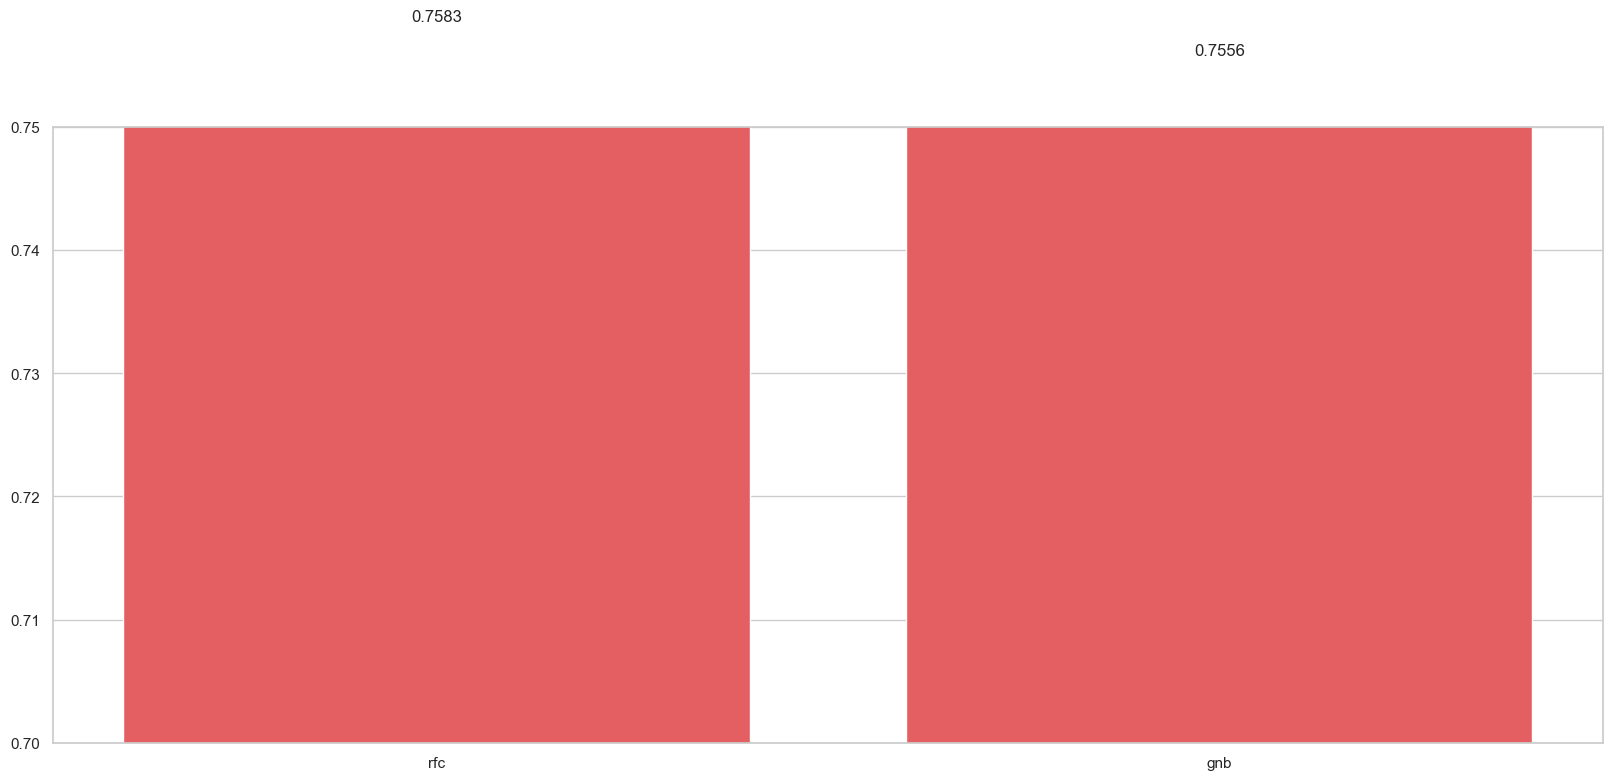

In [112]:
x = ["rfc","gnb"]
y = [rf_model.score(X_test,y_test),clf.score(X_test,y_test)]
plt.figure(figsize=(20,8))
for i in range(len(x)):
    height = y[i]
    plt.text(x[i], height, '%.4f' %height, ha='center', va='bottom', size = 12)
plt.ylim(0.7,0.75)
plt.bar(x,y,color='#e35f62')

In [113]:
gnb_yt = []
rfc_yt = []
for ans in range(len(y_test.values)):
    if gnb_test_pred[ans] == y_test.values[ans]:
        gnb_yt.append("o")
    if gnb_test_pred[ans] != y_test.values[ans]:
        gnb_yt.append("x")
    if rfc_test_pred[ans] == y_test.values[ans]:
        rfc_yt.append("o")
    if rfc_test_pred[ans] != y_test.values[ans]:
        rfc_yt.append("x")
        
print(np.array(gnb_yt))
print("Number of correct answers: ",np.array(gnb_yt).tolist().count("o"))        

['o' 'x' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'x' 'o' 'o' 'x' 'o' 'x' 'o' 'o' 'x'
 'o' 'x' 'o' 'x' 'x' 'o' 'o' 'x' 'o' 'x' 'o' 'o' 'x' 'x' 'x' 'x' 'o' 'o'
 'o' 'o' 'x' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'x' 'o' 'o' 'o' 'o' 'x' 'o'
 'o' 'x' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'x' 'x' 'x' 'o'
 'x' 'x' 'o' 'o' 'o' 'o' 'x' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o'
 'o' 'o' 'o' 'x' 'x' 'o' 'x' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o'
 'o' 'o' 'o' 'o' 'o' 'x' 'o' 'o' 'o' 'o' 'x' 'x' 'x' 'o' 'x' 'o' 'x' 'o'
 'o' 'o' 'x' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'x' 'o' 'o' 'x' 'x' 'o' 'o' 'o'
 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'x' 'x' 'o' 'x' 'o'
 'x' 'o' 'o' 'x' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'x' 'o' 'o' 'o' 'o' 'x' 'o'
 'o' 'x' 'x' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'x' 'o' 'o' 'x' 'o' 'o'
 'o' 'o' 'x' 'o' 'o' 'o' 'x' 'o' 'x' 'o' 'o' 'o' 'x' 'x' 'o' 'o' 'x' 'o'
 'o' 'o' 'x' 'o' 'o' 'o' 'o' 'o' 'x' 'o' 'x' 'o' 'x' 'x' 'o' 'x' 'o' 'o'
 'o' 'o' 'o' 'o' 'o' 'o' 'x' 'o' 'o' 'o' 'o' 'x' 'o

In [114]:
print(np.array(rfc_yt))
print("Number of correct answers: ",np.array(rfc_yt).tolist().count("o"))
print(len(rfc_yt))

['o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'x' 'o' 'o' 'x' 'o' 'x' 'o' 'o' 'x'
 'o' 'o' 'o' 'x' 'x' 'o' 'o' 'x' 'o' 'x' 'o' 'x' 'x' 'x' 'x' 'x' 'o' 'o'
 'o' 'o' 'x' 'o' 'x' 'o' 'o' 'o' 'o' 'o' 'o' 'x' 'o' 'o' 'o' 'o' 'x' 'o'
 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'x' 'x' 'o' 'x' 'o'
 'x' 'x' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o'
 'o' 'o' 'o' 'x' 'x' 'o' 'x' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'x' 'o' 'o'
 'o' 'o' 'o' 'o' 'x' 'x' 'o' 'o' 'o' 'x' 'x' 'x' 'x' 'o' 'x' 'o' 'x' 'o'
 'o' 'o' 'x' 'o' 'o' 'o' 'o' 'o' 'x' 'o' 'x' 'o' 'o' 'o' 'x' 'o' 'o' 'o'
 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'x' 'x' 'o' 'x' 'o'
 'x' 'o' 'o' 'x' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'x' 'o' 'o' 'o' 'o' 'x' 'o'
 'o' 'x' 'x' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'x' 'x' 'o' 'o' 'x' 'o' 'o'
 'o' 'o' 'x' 'o' 'o' 'o' 'x' 'o' 'x' 'o' 'o' 'o' 'x' 'x' 'o' 'o' 'x' 'o'
 'o' 'o' 'x' 'o' 'o' 'o' 'o' 'o' 'x' 'o' 'o' 'o' 'x' 'x' 'o' 'x' 'o' 'o'
 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'x' 'o

The previous results show that the Naive Bayes model scored the highest score without tuning, but the accuracy obtained by finding the optimized tuning value of the Random Forest Classifier model showed higher accuracy than the tuned Navie Bayes . Therefore, since the results may vary depending on the tuning method and parameter setting method of each model, I think it is the most efficient way to find a machine learning model that is best suited to the data by improving understanding of the characteristics and performance of each model.

